### Урок 3. Классификация. Логистическая регрессия.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2,  1, 3, 3, 1, 2]], dtype = np.float64)
y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype = np.float64)

In [4]:
X

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e+00, 1.00e+00, 2.00e+00, 5.00e+00, 3.00e+00, 0.00e+00,
        5.00e+00, 1.00e+01, 1.00e+00, 2.00e+00],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [5]:
y

array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.])

In [6]:
def calc_std_feat(x):
    res = (x - x.mean()) / x.std()
    return res

In [7]:
X_st = X.copy()
X_st[2, :] = calc_std_feat(X[2, :])

In [8]:
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [ 1.        ,  1.        ,  2.        ,  5.        ,  3.        ,
         0.        ,  5.        , 10.        ,  1.        ,  2.        ],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [ 1.        ,  1.        ,  2.        ,  1.        ,  2.        ,
         1.        ,  3.        ,  3.        ,  1.        ,  2.        ]])

In [9]:
def calc_logloss(y, y_pred):
    err = - np.mean(y * np.log(y_pred+0.00001) + (1.0 - y) * np.log(1.0 - y_pred+0.00001))
    err = np.sum(err)
    return err

In [10]:
np.log(0.0001)

-9.210340371976182

In [11]:
# Пример применения
y1 = np.array([1, 0])
y_pred1 = np.array([0.8, 0])
calc_logloss(y1, y_pred1)

0.11156052572116686

In [12]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

In [13]:
z = np.linspace(-10, 10, 101)

In [14]:
probabilities = sigmoid(z)

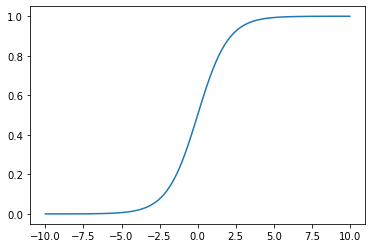

In [15]:
plt.plot(z, probabilities)
plt.show()

Logistic Regression

In [16]:
def eval_model(X, y, iterations, alpha=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha * (1/n * np.dot((y_pred - y), X.T))
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [17]:
W = eval_model(X_st, y, iterations=5000, alpha=1e-2)

500 [ 0.04031921 -0.720604    0.858267    1.32697244] 0.49100912311977307
1000 [-0.1669589  -0.75349668  0.95162197  1.46323139] 0.4764682760414929
1500 [-0.33556146 -0.78996746  0.98225915  1.60965694] 0.4660076498038663
2000 [-0.49166468 -0.82099927  0.98636221  1.74699589] 0.4571543027866041
2500 [-0.64188001 -0.84596455  0.97574637  1.87305093] 0.44930997194898226
3000 [-0.78798431 -0.86580831  0.95545209  1.98911744] 0.4421813980339085
3500 [-0.93053401 -0.8815749   0.92828248  2.09687612] 0.4355950357639646
4000 [-1.06976183 -0.89413688  0.89609267  2.19777793] 0.4294413807571149
4500 [-1.20580715 -0.90418283  0.86022452  2.29298371] 0.42364814250479627
5000 [-1.33877824 -0.91225125  0.82169045  2.38341031] 0.4181655477427311


## Д/з

1*. Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.

2. Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.
3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).
4. Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).

5*. Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.
6. Могла ли модель переобучиться? Почему?

№1

In [18]:
def calc_logloss_new(y, y_pred):
    i=0
    k=1
    for i in range(y_pred.size):
        if y_pred[i]==0:
            y_pred=np.delete(y_pred,i)
            y=np.delete(y,i)
            k+= 1
    err = - np.mean(y * np.log(y_pred) + (1.0 - y) *np.log(1.0 - y_pred))
    err = np.sum(err)/k
    return err
y1 = np.array([1, 0])
y_pred1 = np.array([0.8, 0])
calc_logloss_new(y1, y_pred1)

0.11157177565710485

Решил данный номер с помощью исключения пар элементов массивов с нулевым значением. Проверил с "костылями" предложенными во время лекции-ответ сходится

In [ ]:
def calc_logloss(y, y_pred):
    err = - np.mean(y * np.log(y_pred+0.00001) + (1.0 - y) * np.log(1.0 - y_pred+0.00001))
    err = np.sum(err)
    return err
# Пример применения
y1 = np.array([1, 0])
y_pred1 = np.array([0.8, 0])
calc_logloss(y1, y_pred1)

№2

In [ ]:
def log_loss(w, X, y):
    m = X.shape[1]

    # используем функцию сигмоиды, написанную ранее
    A = sigmoid(np.dot(w.T, X))
    
    loss = -1.0 / m * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))
    loss = np.squeeze(loss)
    grad = 1.0 / m * np.dot(X, (A - y).T)
    
    return loss, grad

In [ ]:
W = eval_model(X_st, y, iterations=37000, alpha=9e-1)
log_loss(W, X_st, y)

In [ ]:
При выполнении данного задания действовал аналогично первому заданию №1

№3

In [ ]:
def calc_pred_proba(w,x):
    y_pred_proba=sigmoid(np.dot(w.T, x))
    return y_pred_proba

In [ ]:
calc_pred_proba(W,X_st)

№4

In [ ]:
def calc_pred(w,x):
    y_pred_proba=sigmoid(np.dot(w.T, x))
    y_pred = []
    for item in y_pred_proba:
        if item>0.5:
             y_pred.append(1)
        elif item <= 0.5:
            y_pred.append(-1)
return y_pred

In [ ]:
calc_pred(W,X_st)

№5

In [35]:
y_train=[1,-1, -1, -1]
y_pred=[1,-1, 1, -1]
accuracity=np.mean([y_pred == y_train])*100

In [36]:
def matr_err(y_pred, y_train):
    matr=np.array([[0, 0], [0, 0]])
    for i in range(len(y_pred)):
        k=int((-y_pred[i]+1)/2)
        j=int((-y_train[i]+1)/2)
        matr[j, k]+=1
    return matr

In [37]:
matr_err(y_pred, y_train)

array([[1, 0],
       [1, 2]])

In [38]:
a=matr_err(y_pred, y_train)
precision=a[0,0]/(a[0,0]+a[0,1])
print(precision)

1.0


In [39]:
recall=a[0,0]/(a[0,0]+a[1,0])
print(recall)

0.5


In [42]:
F1_score=2*precision*recall/(precision+recall)
print(F1_score)

0.6666666666666666


In [ ]:
№6

In [ ]:
Да, модель логической регресси может переобучиться и построить поверхность(более сложную зависимость координат друг от друга, чем график), идеально отделеяющие различные группые элементов. 